# Import Data

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files

%matplotlib inline

In [2]:
# import data
c1_user_log = pd.read_csv('c1_user_log.csv')
c2_user_log = pd.read_csv('c2_user_log.csv')
user_score = pd.read_csv('user_test_score.csv')

In [3]:
display(c1_user_log.head(2))
display(c2_user_log.head(2))
display(user_score.head(2))

,cv_uid,cv_cid,action_type,assoc_id,assoc_id2,timestamp,completed
0,6AFV1E84QXRHV3IQZDVD,KTDV6J95MMM8T3NYTKJ8,enrolled,4SSGRYQUWTF4N81YBKCG,SRGWN4LOSQEK8A51ENFQ,1546826145,1
1,6AFV1E84QXRHV3IQZDVD,KTDV6J95MMM8T3NYTKJ8,quiz_opened,D6RL6F8ZMBYOG1K31L0W,0ABQBRMJ41Q0IXJYQAF3,1546826475,1


,cv_uid,cv_cid,action_type,assoc_id,assoc_id2,timestamp,completed
0,ATX0WILQ2Q5G5Y70RJF6,OTS26V4DL3U4LE4YHWAF,enrolled,4SSGRYQUWTF4N81YBKCG,SRGWN4LOSQEK8A51ENFQ,1544576600,0
1,HMWL4WPWYVS097LWWGQO,OTS26V4DL3U4LE4YHWAF,enrolled,4SSGRYQUWTF4N81YBKCG,SRGWN4LOSQEK8A51ENFQ,1544576664,0


,user_test_score_id,cv_uid,test_nid,sub_id,point,total
0,1,GEW2S6U24ZMJTSJLEPTK,EVYPCWEHD3NO60SVF2DD,ZW146UB6QZPD643Y4FJ3,2,2
1,2,WCB8KSCK643JQCORSFQ2,R2QG06ZY6NX9FS2HMAS5,0KL8GRMBK2PLB1TZR515,18,20


In [4]:
# create user enrolled
c1_enrolled_array = c1_user_log[c1_user_log['action_type'] == 'enrolled']['cv_uid'].unique()
c2_enrolled_array = c2_user_log[c2_user_log['action_type'] == 'enrolled']['cv_uid'].unique()

In [5]:
# check total users enrolled each course
print(len(c1_enrolled_array))
print(len(c2_enrolled_array))

4000
3828


In [6]:
# create quiz array of each course
c1_quiz_array = c1_user_log[c1_user_log['action_type'] == 'quiz_submitted']['assoc_id'].unique()
c2_quiz_array = c2_user_log[c2_user_log['action_type'] == 'quiz_submitted']['assoc_id'].unique()

In [7]:
print(len(c1_quiz_array)) # 6
print(c1_quiz_array)
print(len(c2_quiz_array)) # 11
print(c2_quiz_array)

6
['D6RL6F8ZMBYOG1K31L0W' 'EEPHRRJS71QB8ZJP7MIT' 'LANPBO6667YUN6JLJU8F'
 'ZQWTRFH48Z8OW7EWMG52' 'H59AAI3DCTNSCN5EU5EC' 'W0O7ARGWYKORU29CAIX1']
11
['H3W338MV1JEU9QG0UCP1' 'H2JAJIK0H12LT6NOKGJX' 'UZ575QUHBZOTBQOKEZ2H'
 'WHJBBBGVHN744OFXZYL2' 'T1Q6U7M2F64PPHGRNDNU' 'UDA8CQE8U16K5C78FIX1'
 '7NA6L93RGO0WIOHDVJVO' 'VL5BT36I1AOGDC7BM2NF' 'GBRSUDIKK3TKN1Y8B7EG'
 'QSIQ9R5ZDRL1VOA6Z5Q9' 'QZRVYL4LE89RW6Z77QRB']


In [8]:
c1_score = user_score[user_score['test_nid'].isin(c1_quiz_array)]
c2_score = user_score[user_score['test_nid'].isin(c2_quiz_array)]

In [9]:
c1_score = c1_score[c1_score['cv_uid'].isin(c1_enrolled_array)]
c2_score = c2_score[c2_score['cv_uid'].isin(c2_enrolled_array)]

In [10]:
display(c1_score.head())
display(c2_score.head())

,user_test_score_id,cv_uid,test_nid,sub_id,point,total
285377,285673,6AFV1E84QXRHV3IQZDVD,D6RL6F8ZMBYOG1K31L0W,JVKRBMM6ST2IFNYG9998,3,3
285380,285676,6AFV1E84QXRHV3IQZDVD,EEPHRRJS71QB8ZJP7MIT,QR68TZRGJ5QE033HU6IR,3,3
285383,285679,6AFV1E84QXRHV3IQZDVD,LANPBO6667YUN6JLJU8F,5CHH0VH1OB0K3485NSF7,3,3
285388,285684,6AFV1E84QXRHV3IQZDVD,ZQWTRFH48Z8OW7EWMG52,LX22K0ATLTCGLIZWR1L6,3,3
285391,285687,6AFV1E84QXRHV3IQZDVD,H59AAI3DCTNSCN5EU5EC,APTXGTK0L2OK7CB3VMOC,3,3


,user_test_score_id,cv_uid,test_nid,sub_id,point,total
248280,248554,9NCGBCHXB94IW1IXQ1HV,H3W338MV1JEU9QG0UCP1,9Z9B7BT3QAAFHKI3505V,16,20
248282,248556,1E526W7YNWQ7J4HAJRKG,H3W338MV1JEU9QG0UCP1,7GJKN4JOO21MCHMDIO2Q,11,20
248291,248565,DIV51XH24QNG3CBM5A6U,H3W338MV1JEU9QG0UCP1,VNYFCB1YHRJMBG5TMONY,16,20
248294,248568,0Y6I9I1NP4N1H7YQ2YG9,H3W338MV1JEU9QG0UCP1,67453OKL4XZCFAWKCQZ9,16,20
248296,248570,NFMYTK1LU3C6QGUMCY6U,H3W338MV1JEU9QG0UCP1,HDVP585MALCKPJIR54VB,17,20


In [11]:
# pre-test and post-test
c1_pre = 'D6RL6F8ZMBYOG1K31L0W'
c1_post = 'W0O7ARGWYKORU29CAIX1'

c2_pre = 'H3W338MV1JEU9QG0UCP1'
c2_post = 'QZRVYL4LE89RW6Z77QRB'

# hist ของแต่ละ quiz เน้น pre post

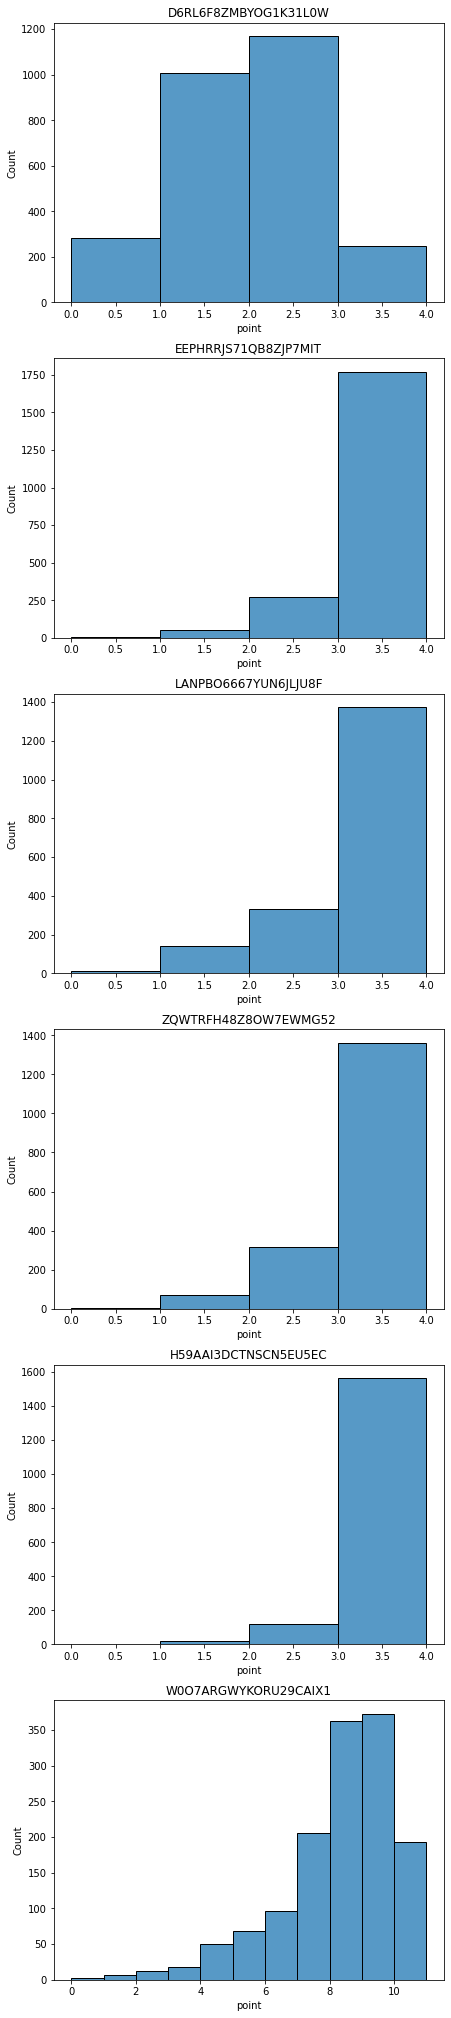

In [12]:
fig, ax = plt.subplots(len(c1_quiz_array), 1, figsize=(7, len(c1_quiz_array)*6))
for i in range(len(c1_quiz_array)):
  quiz = c1_score[c1_score['test_nid'] == c1_quiz_array[i]]
  bins = quiz['total'].unique()[0]+2
  sns.histplot(x=quiz['point'], bins=np.arange(bins), ax=ax[i])
  ax[i].set_title(c1_quiz_array[i])

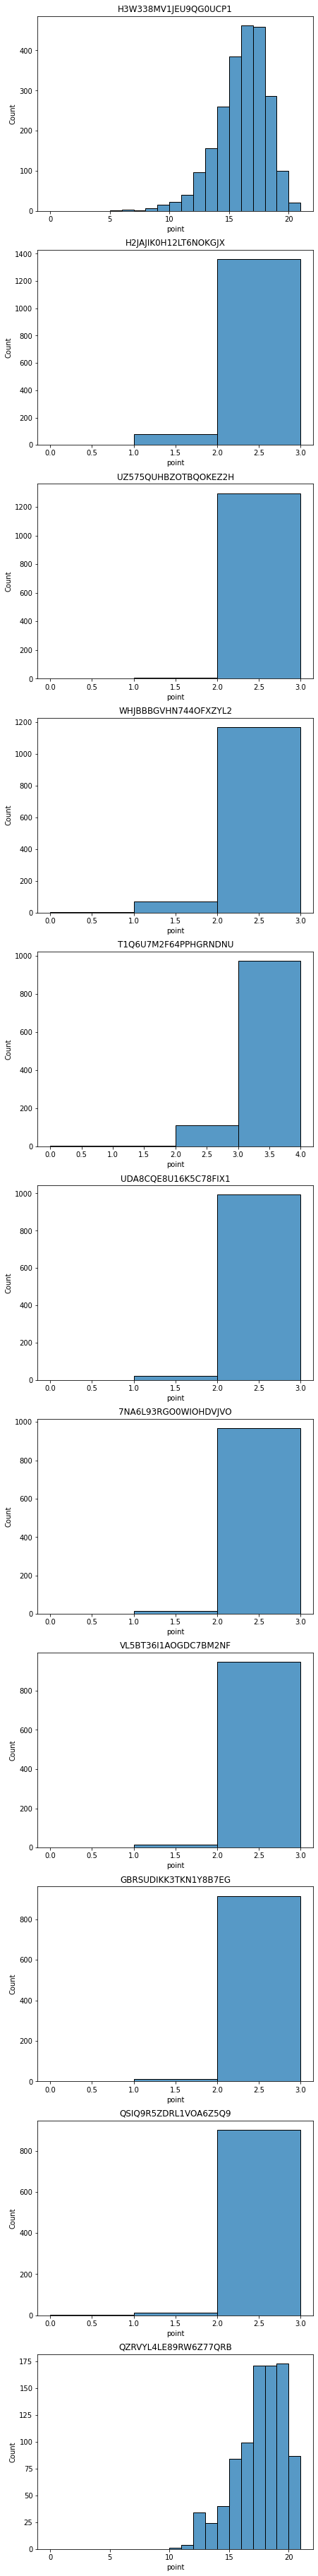

In [13]:
fig, ax = plt.subplots(len(c2_quiz_array), 1, figsize=(7, len(c2_quiz_array)*6))
for i in range(len(c2_quiz_array)):
  quiz = c2_score[c2_score['test_nid'] == c2_quiz_array[i]]
  bins = quiz['total'].unique()[0]+2
  sns.histplot(x=quiz['point'], bins=np.arange(bins), ax=ax[i])
  ax[i].set_title(c2_quiz_array[i])

แสดงให้เห็นความต่างระหว่างก่อนเรียนกับหลังเรียนได้ไหม แบบคนได้ความรู้เยอะขึ้น หรือบอกได้ว่าคนมีความรู้อยู่แล้ว

# hist ของ post-pre

บอกได้ว่าเรียนแล้วมีพัฒนาการเยอะแค่ไหน

In [14]:
c1_score_pre = c1_score[c1_score['test_nid'] == c1_pre].copy()
c1_score_post = c1_score[c1_score['test_nid'] == c1_post].copy()

c2_score_pre = c2_score[c2_score['test_nid'] == c2_pre].copy()
c2_score_post = c2_score[c2_score['test_nid'] == c2_post].copy()

In [15]:
c1_score_pre['percent'] = c1_score_pre.apply(lambda x: x['point']/x['total'], axis=1)
c1_score_post['percent'] = c1_score_post.apply(lambda x: x['point']/x['total'], axis=1)

c2_score_pre['percent'] = c2_score_pre.apply(lambda x: x['point']/x['total'], axis=1)
c2_score_post['percent'] = c2_score_post.apply(lambda x: x['point']/x['total'], axis=1)

In [16]:
c1_pre_post_diff = c1_score_post[['cv_uid', 'percent']].copy()
c1_pre_post_diff.rename(columns={'percent':'post_percent'}, inplace=True)
c2_pre_post_diff = c2_score_post[['cv_uid', 'percent']].copy()
c2_pre_post_diff.rename(columns={'percent':'post_percent'}, inplace=True)

In [17]:
display(c1_pre_post_diff.head())
display(c2_pre_post_diff.head())

,cv_uid,post_percent
285594,6AFV1E84QXRHV3IQZDVD,1.0
286362,U4T4UXX1GDO4L1MQVJG6,0.9
286560,1ZHNXNWZDZEO511K16S0,0.8
287074,3HT5EROBCGDS6RPOLPJD,0.9
287251,IOX5ZYC5A6GNZT89M167,0.6


,cv_uid,post_percent
248778,KXV1D5AMBYJW9NI7AITP,0.90
248902,2EA55FP14U0CQX3PIBK3,0.85
249049,O6O4CWTDB2LYLR2EGOCL,0.65
249229,XNV39VJ5CXT7L52R5SO5,0.95
249514,ZSMRZD8I6UQ0BCOLUZFP,1.00


In [18]:
c1_pre_post_diff = c1_pre_post_diff.merge(c1_score_pre[['cv_uid', 'percent']], how='left', on='cv_uid')
c1_pre_post_diff.rename(columns={'percent':'pre_percent'}, inplace=True)
c2_pre_post_diff = c2_pre_post_diff.merge(c2_score_pre[['cv_uid', 'percent']], how='left', on='cv_uid')
c2_pre_post_diff.rename(columns={'percent':'pre_percent'}, inplace=True)

In [19]:
display(c1_pre_post_diff.head())
display(c2_pre_post_diff.head())

,cv_uid,post_percent,pre_percent
0,6AFV1E84QXRHV3IQZDVD,1.0,1.000000
1,U4T4UXX1GDO4L1MQVJG6,0.9,0.333333
2,1ZHNXNWZDZEO511K16S0,0.8,0.666667
3,3HT5EROBCGDS6RPOLPJD,0.9,0.666667
4,IOX5ZYC5A6GNZT89M167,0.6,1.000000


,cv_uid,post_percent,pre_percent
0,KXV1D5AMBYJW9NI7AITP,0.90,0.85
1,2EA55FP14U0CQX3PIBK3,0.85,0.75
2,O6O4CWTDB2LYLR2EGOCL,0.65,0.65
3,XNV39VJ5CXT7L52R5SO5,0.95,0.70
4,ZSMRZD8I6UQ0BCOLUZFP,1.00,0.85


In [20]:
c1_pre_post_diff['development'] = c1_pre_post_diff.apply(lambda x: x['post_percent']-x['pre_percent'], axis=1)
c2_pre_post_diff['development'] = c2_pre_post_diff.apply(lambda x: x['post_percent']-x['pre_percent'], axis=1)

In [21]:
display(c1_pre_post_diff.head())
display(c2_pre_post_diff.head())

,cv_uid,post_percent,pre_percent,development
0,6AFV1E84QXRHV3IQZDVD,1.0,1.000000,0.000000
1,U4T4UXX1GDO4L1MQVJG6,0.9,0.333333,0.566667
2,1ZHNXNWZDZEO511K16S0,0.8,0.666667,0.133333
3,3HT5EROBCGDS6RPOLPJD,0.9,0.666667,0.233333
4,IOX5ZYC5A6GNZT89M167,0.6,1.000000,-0.400000


,cv_uid,post_percent,pre_percent,development
0,KXV1D5AMBYJW9NI7AITP,0.90,0.85,0.05
1,2EA55FP14U0CQX3PIBK3,0.85,0.75,0.10
2,O6O4CWTDB2LYLR2EGOCL,0.65,0.65,0.00
3,XNV39VJ5CXT7L52R5SO5,0.95,0.70,0.25
4,ZSMRZD8I6UQ0BCOLUZFP,1.00,0.85,0.15


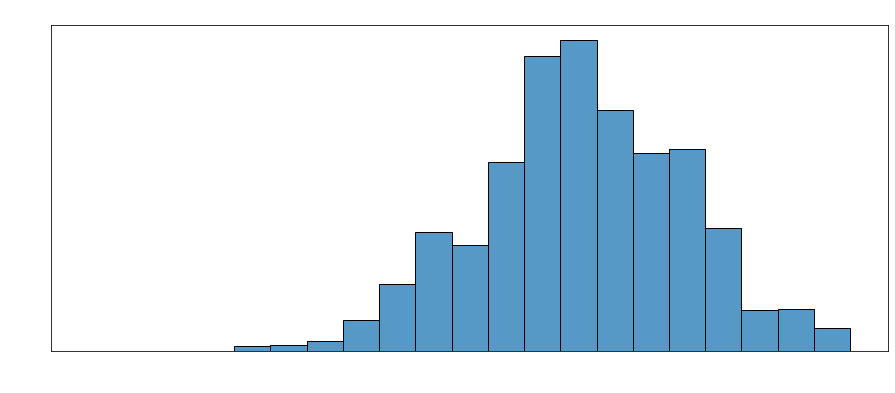

In [22]:
fig, ax = plt.subplots(figsize=(15,6))
sns.histplot(x=c1_pre_post_diff['development'], bins=np.arange(-1.1, 1.1, 0.1), ax=ax)
ax.set_title('Course 1: development of users from difference of PRE and POST', color='white', size=16)
ax.set_xlabel('Difference', color='white', size=14)
ax.set_ylabel('Number of Users', color='white', size=14)
ax.tick_params(axis='both', colors='white')

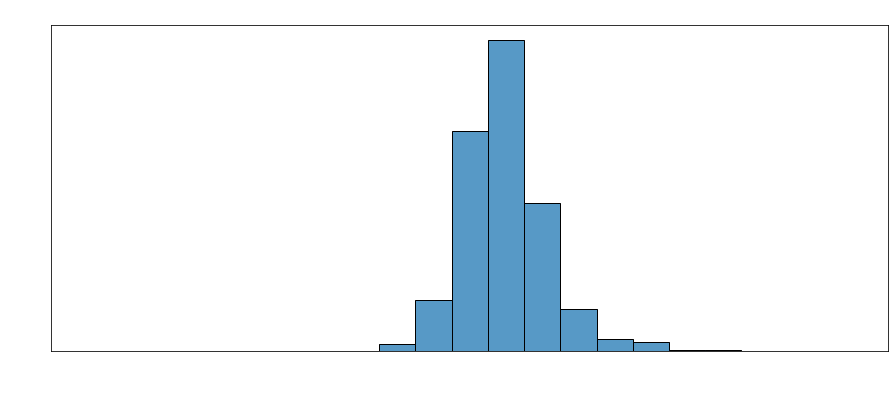

In [23]:
fig, ax = plt.subplots(figsize=(15,6))
sns.histplot(x=c2_pre_post_diff['development'], bins=np.arange(-1.1, 1.1, 0.1), ax=ax)
ax.set_title('Course 2: development of users from difference of PRE and POST', color='white', size=16)
ax.set_xlabel('Difference', color='white', size=14)
ax.set_ylabel('Number of Users', color='white', size=14)
ax.tick_params(axis='both', colors='white')

# จำนวนคนที่ คะแนน quiz รวมกันแล้วได้เกิน 60 แสดงว่าได้ใบ cer

filter ต้องเป็นคนที่จบเท่านั้น!!

In [24]:
# quiz รวมกัน 50% ไม่รวม pre-test
# post-test 50%
# เกิน 60% ได้ใบ cer
# completed_intime

In [25]:
def intime_late(row):
  if row['action_type'] == 'completed_intime':
    return 1
  else:
    return 0

In [26]:
# must completed intime to get certificate
c1_completed = c1_user_log[c1_user_log['action_type'].isin(['completed_intime', 'completed_late'])]
c2_completed = c2_user_log[c2_user_log['action_type'].isin(['completed_intime', 'completed_late'])]

In [27]:
c1_completed['intime'] = c1_completed.apply(intime_late, axis=1)
c2_completed['intime'] = c2_completed.apply(intime_late, axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [28]:
display(c1_completed.head())
display(c2_completed.head())

,cv_uid,cv_cid,action_type,assoc_id,assoc_id2,timestamp,completed,intime
14,6AFV1E84QXRHV3IQZDVD,KTDV6J95MMM8T3NYTKJ8,completed_intime,4SSGRYQUWTF4N81YBKCG,SRGWN4LOSQEK8A51ENFQ,1546841359,1,1
34,U4T4UXX1GDO4L1MQVJG6,KTDV6J95MMM8T3NYTKJ8,completed_intime,4SSGRYQUWTF4N81YBKCG,SRGWN4LOSQEK8A51ENFQ,1546880047,1,1
319,1ZHNXNWZDZEO511K16S0,KTDV6J95MMM8T3NYTKJ8,completed_intime,4SSGRYQUWTF4N81YBKCG,SRGWN4LOSQEK8A51ENFQ,1546912569,1,1
1296,3HT5EROBCGDS6RPOLPJD,KTDV6J95MMM8T3NYTKJ8,completed_intime,4SSGRYQUWTF4N81YBKCG,SRGWN4LOSQEK8A51ENFQ,1546920468,1,1
1530,IOX5ZYC5A6GNZT89M167,KTDV6J95MMM8T3NYTKJ8,completed_intime,4SSGRYQUWTF4N81YBKCG,SRGWN4LOSQEK8A51ENFQ,1546923403,1,1


,cv_uid,cv_cid,action_type,assoc_id,assoc_id2,timestamp,completed,intime
701,KXV1D5AMBYJW9NI7AITP,OTS26V4DL3U4LE4YHWAF,completed_intime,4SSGRYQUWTF4N81YBKCG,SRGWN4LOSQEK8A51ENFQ,1544590723,1,1
810,2EA55FP14U0CQX3PIBK3,OTS26V4DL3U4LE4YHWAF,completed_intime,4SSGRYQUWTF4N81YBKCG,SRGWN4LOSQEK8A51ENFQ,1544594681,1,1
927,O6O4CWTDB2LYLR2EGOCL,OTS26V4DL3U4LE4YHWAF,completed_intime,4SSGRYQUWTF4N81YBKCG,SRGWN4LOSQEK8A51ENFQ,1544597269,1,1
999,XNV39VJ5CXT7L52R5SO5,OTS26V4DL3U4LE4YHWAF,completed_intime,4SSGRYQUWTF4N81YBKCG,SRGWN4LOSQEK8A51ENFQ,1544599262,1,1
1103,ZSMRZD8I6UQ0BCOLUZFP,OTS26V4DL3U4LE4YHWAF,completed_intime,4SSGRYQUWTF4N81YBKCG,SRGWN4LOSQEK8A51ENFQ,1544602871,1,1


In [29]:
# must completed intime to get certificate
c1_completed_array = c1_user_log[c1_user_log['completed'] == 1]['cv_uid'].unique()
c2_completed_array = c2_user_log[c2_user_log['completed'] == 1]['cv_uid'].unique()

In [30]:
print(len(c1_completed_array))
print(len(c2_completed_array))

1326
884


In [31]:
c1_completed_score = c1_score[c1_score['cv_uid'].isin(c1_completed_array)]
c2_completed_score = c2_score[c2_score['cv_uid'].isin(c2_completed_array)]

In [32]:
print(c1_completed_score['cv_uid'].nunique())
print(c2_completed_score['cv_uid'].nunique())

1326
884


In [33]:
c1_intime_user = c1_completed[c1_completed['intime'] == 1]['cv_uid'].unique()
c2_intime_user = c2_completed[c2_completed['intime'] == 1]['cv_uid'].unique()

In [34]:
def intime(row, intime_user):
  if row['cv_uid'] in intime_user:
    return 1
  else:
    return 0

In [35]:
c1_completed_score['intime'] = c1_completed_score.apply(lambda x: intime(x, c1_intime_user), axis=1)
c2_completed_score['intime'] = c2_completed_score.apply(lambda x: intime(x, c2_intime_user), axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [36]:
display(c1_completed_score.head())
display(c1_completed_score.head())

,user_test_score_id,cv_uid,test_nid,sub_id,point,total,intime
285377,285673,6AFV1E84QXRHV3IQZDVD,D6RL6F8ZMBYOG1K31L0W,JVKRBMM6ST2IFNYG9998,3,3,1
285380,285676,6AFV1E84QXRHV3IQZDVD,EEPHRRJS71QB8ZJP7MIT,QR68TZRGJ5QE033HU6IR,3,3,1
285383,285679,6AFV1E84QXRHV3IQZDVD,LANPBO6667YUN6JLJU8F,5CHH0VH1OB0K3485NSF7,3,3,1
285388,285684,6AFV1E84QXRHV3IQZDVD,ZQWTRFH48Z8OW7EWMG52,LX22K0ATLTCGLIZWR1L6,3,3,1
285391,285687,6AFV1E84QXRHV3IQZDVD,H59AAI3DCTNSCN5EU5EC,APTXGTK0L2OK7CB3VMOC,3,3,1


,user_test_score_id,cv_uid,test_nid,sub_id,point,total,intime
285377,285673,6AFV1E84QXRHV3IQZDVD,D6RL6F8ZMBYOG1K31L0W,JVKRBMM6ST2IFNYG9998,3,3,1
285380,285676,6AFV1E84QXRHV3IQZDVD,EEPHRRJS71QB8ZJP7MIT,QR68TZRGJ5QE033HU6IR,3,3,1
285383,285679,6AFV1E84QXRHV3IQZDVD,LANPBO6667YUN6JLJU8F,5CHH0VH1OB0K3485NSF7,3,3,1
285388,285684,6AFV1E84QXRHV3IQZDVD,ZQWTRFH48Z8OW7EWMG52,LX22K0ATLTCGLIZWR1L6,3,3,1
285391,285687,6AFV1E84QXRHV3IQZDVD,H59AAI3DCTNSCN5EU5EC,APTXGTK0L2OK7CB3VMOC,3,3,1


In [37]:
c1_quiz_score = c1_completed_score[~c1_completed_score['test_nid'].isin([c1_pre, c1_post])]
c2_quiz_score = c2_completed_score[~c2_completed_score['test_nid'].isin([c2_pre, c2_post])]

In [38]:
c1_post_score = c1_completed_score[c1_completed_score['test_nid'] == c1_post]
c2_post_score = c2_completed_score[c2_completed_score['test_nid'] == c2_post]

In [39]:
c1_sum_score = c1_quiz_score.groupby('cv_uid').agg({'point':'sum', 'total':'sum', 'intime':'max'})
c2_sum_score = c2_quiz_score.groupby('cv_uid').agg({'point':'sum', 'total':'sum', 'intime':'max'})

In [40]:
display(c1_sum_score.head())
display(c2_sum_score.head())

,point,total,intime
cv_uid,,,
00UAS3P4F2CM8TS01Q25,12,12,1
012REYX36T3HMYZV2001,11,12,1
0364AWOA2J7R9BPIZGGX,12,12,1
03IWBSK870LW3IYRC09S,12,12,1
05979TAHETK9A5TOMQVA,12,12,1


,point,total,intime
cv_uid,,,
00AMTVRBXWM0TTPEHFV1,19,19,1
00PRZN8YTKUT9J30QZX5,19,19,1
012REYX36T3HMYZV2001,19,19,1
02N25S42ZHC00YSWGJWH,19,19,1
0364AWOA2J7R9BPIZGGX,19,19,1


In [41]:
c1_sum_score['50_point'] = c1_sum_score.apply(lambda x: (x['point']/x['total'])*50, axis=1)
c2_sum_score['50_point'] = c2_sum_score.apply(lambda x: (x['point']/x['total'])*50, axis=1)

In [42]:
display(c1_sum_score.head())
display(c2_sum_score.head())

,point,total,intime,50_point
cv_uid,,,,
00UAS3P4F2CM8TS01Q25,12,12,1,50.000000
012REYX36T3HMYZV2001,11,12,1,45.833333
0364AWOA2J7R9BPIZGGX,12,12,1,50.000000
03IWBSK870LW3IYRC09S,12,12,1,50.000000
05979TAHETK9A5TOMQVA,12,12,1,50.000000


,point,total,intime,50_point
cv_uid,,,,
00AMTVRBXWM0TTPEHFV1,19,19,1,50.0
00PRZN8YTKUT9J30QZX5,19,19,1,50.0
012REYX36T3HMYZV2001,19,19,1,50.0
02N25S42ZHC00YSWGJWH,19,19,1,50.0
0364AWOA2J7R9BPIZGGX,19,19,1,50.0


In [43]:
c1_post_score['50_post'] = c1_post_score.apply(lambda x: (x['point']/x['total'])*50, axis=1)
c2_post_score['50_post'] = c2_post_score.apply(lambda x: (x['point']/x['total'])*50, axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [44]:
display(c1_post_score.head())
display(c2_post_score.head())

,user_test_score_id,cv_uid,test_nid,sub_id,point,total,intime,50_post
285594,285890,6AFV1E84QXRHV3IQZDVD,W0O7ARGWYKORU29CAIX1,JIJPAEX1WX12EYSZLXXZ,10,10,1,50.0
286362,286659,U4T4UXX1GDO4L1MQVJG6,W0O7ARGWYKORU29CAIX1,WOCRS6CKD4PNZT0WTNXW,9,10,1,45.0
286560,286857,1ZHNXNWZDZEO511K16S0,W0O7ARGWYKORU29CAIX1,0BAJ01DQARUNQVS5ZIP1,8,10,1,40.0
287074,287371,3HT5EROBCGDS6RPOLPJD,W0O7ARGWYKORU29CAIX1,ZMN2INA9CGCRWTOXHJV2,9,10,1,45.0
287251,287548,IOX5ZYC5A6GNZT89M167,W0O7ARGWYKORU29CAIX1,C8FIIT99OSU4BIMQMW8U,6,10,1,30.0


,user_test_score_id,cv_uid,test_nid,sub_id,point,total,intime,50_post
248778,249053,KXV1D5AMBYJW9NI7AITP,QZRVYL4LE89RW6Z77QRB,IURSRWFJ4B5N136S9GJQ,18,20,1,45.0
248902,249177,2EA55FP14U0CQX3PIBK3,QZRVYL4LE89RW6Z77QRB,SEMREAC2HWB2EWQK85WV,17,20,1,42.5
249049,249324,O6O4CWTDB2LYLR2EGOCL,QZRVYL4LE89RW6Z77QRB,DGUW7U50Y5HCOA1X84Z3,13,20,1,32.5
249229,249504,XNV39VJ5CXT7L52R5SO5,QZRVYL4LE89RW6Z77QRB,FROUX5GWG6BLYZFXVN3C,19,20,1,47.5
249514,249789,ZSMRZD8I6UQ0BCOLUZFP,QZRVYL4LE89RW6Z77QRB,11C2WM62KRBSTFL5OE9O,20,20,1,50.0


In [45]:
c1_post_score.drop(['user_test_score_id', 'test_nid', 'sub_id', 'intime'], axis=1, inplace=True)
c2_post_score.drop(['user_test_score_id', 'test_nid', 'sub_id', 'intime'], axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [46]:
display(c1_post_score.head())
display(c2_post_score.head())

,cv_uid,point,total,50_post
285594,6AFV1E84QXRHV3IQZDVD,10,10,50.0
286362,U4T4UXX1GDO4L1MQVJG6,9,10,45.0
286560,1ZHNXNWZDZEO511K16S0,8,10,40.0
287074,3HT5EROBCGDS6RPOLPJD,9,10,45.0
287251,IOX5ZYC5A6GNZT89M167,6,10,30.0


,cv_uid,point,total,50_post
248778,KXV1D5AMBYJW9NI7AITP,18,20,45.0
248902,2EA55FP14U0CQX3PIBK3,17,20,42.5
249049,O6O4CWTDB2LYLR2EGOCL,13,20,32.5
249229,XNV39VJ5CXT7L52R5SO5,19,20,47.5
249514,ZSMRZD8I6UQ0BCOLUZFP,20,20,50.0


In [47]:
c1_total_score = pd.merge(c1_sum_score, c1_post_score, how='outer', on='cv_uid', suffixes=('_quiz', '_post'))
c2_total_score = pd.merge(c2_sum_score, c2_post_score, how='outer', on='cv_uid', suffixes=('_quiz', '_post'))

In [48]:
display(c1_total_score.head())
display(c2_total_score.head())

,cv_uid,point_quiz,total_quiz,intime,50_point,point_post,total_post,50_post
0,00UAS3P4F2CM8TS01Q25,12,12,1,50.000000,9,10,45.0
1,012REYX36T3HMYZV2001,11,12,1,45.833333,8,10,40.0
2,0364AWOA2J7R9BPIZGGX,12,12,1,50.000000,7,10,35.0
3,03IWBSK870LW3IYRC09S,12,12,1,50.000000,10,10,50.0
4,05979TAHETK9A5TOMQVA,12,12,1,50.000000,8,10,40.0


,cv_uid,point_quiz,total_quiz,intime,50_point,point_post,total_post,50_post
0,00AMTVRBXWM0TTPEHFV1,19,19,1,50.0,16,20,40.0
1,00PRZN8YTKUT9J30QZX5,19,19,1,50.0,18,20,45.0
2,012REYX36T3HMYZV2001,19,19,1,50.0,18,20,45.0
3,02N25S42ZHC00YSWGJWH,19,19,1,50.0,14,20,35.0
4,0364AWOA2J7R9BPIZGGX,19,19,1,50.0,19,20,47.5


In [49]:
c1_total_score['total'] = c1_total_score.apply(lambda x: x['50_point'] + x['50_post'], axis=1)
c2_total_score['total'] = c2_total_score.apply(lambda x: x['50_point'] + x['50_post'], axis=1)

In [50]:
display(c1_total_score.head())
display(c2_total_score.head())

,cv_uid,point_quiz,total_quiz,intime,50_point,point_post,total_post,50_post,total
0,00UAS3P4F2CM8TS01Q25,12,12,1,50.000000,9,10,45.0,95.000000
1,012REYX36T3HMYZV2001,11,12,1,45.833333,8,10,40.0,85.833333
2,0364AWOA2J7R9BPIZGGX,12,12,1,50.000000,7,10,35.0,85.000000
3,03IWBSK870LW3IYRC09S,12,12,1,50.000000,10,10,50.0,100.000000
4,05979TAHETK9A5TOMQVA,12,12,1,50.000000,8,10,40.0,90.000000


,cv_uid,point_quiz,total_quiz,intime,50_point,point_post,total_post,50_post,total
0,00AMTVRBXWM0TTPEHFV1,19,19,1,50.0,16,20,40.0,90.0
1,00PRZN8YTKUT9J30QZX5,19,19,1,50.0,18,20,45.0,95.0
2,012REYX36T3HMYZV2001,19,19,1,50.0,18,20,45.0,95.0
3,02N25S42ZHC00YSWGJWH,19,19,1,50.0,14,20,35.0,85.0
4,0364AWOA2J7R9BPIZGGX,19,19,1,50.0,19,20,47.5,97.5


In [51]:
# users who completed but do not get certificate are users who completed late.
# however, completed late users total point are more than 60%
print(c1_total_score[(c1_total_score['total'] < 60) & (c1_total_score['intime'] == 1)]['cv_uid'].count())
print(c2_total_score[(c2_total_score['total'] < 60) & (c2_total_score['intime'] == 1)]['cv_uid'].count())
print(c1_total_score[(c1_total_score['total'] < 60) & (c1_total_score['intime'] == 0)]['cv_uid'].count())
print(c2_total_score[(c2_total_score['total'] < 60) & (c2_total_score['intime'] == 0)]['cv_uid'].count())

0
0
0
0


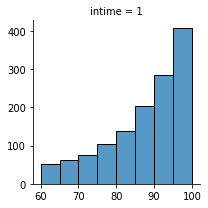

In [52]:
g = sns.FacetGrid(c1_total_score, col="intime")
g.map_dataframe(sns.histplot, x="total", bins=np.arange(60, 105, 5))

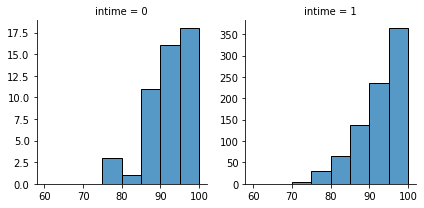

In [53]:
g = sns.FacetGrid(c2_total_score, col="intime", sharey=False)
g.map_dataframe(sns.histplot, x="total", bins=np.arange(60, 105, 5))

# จำนวน submitted ครั้งของแต่ละ quiz แบ่งเป็น completed กับ not-completed

In [54]:
# not pre and post since it can take only one time

In [55]:
c1_submitted = c1_user_log[c1_user_log['action_type'] == 'quiz_submitted']
c2_submitted = c2_user_log[c2_user_log['action_type'] == 'quiz_submitted']

In [56]:
c1_submitted = c1_submitted[~c1_submitted['cv_cid'].isin([c1_pre, c1_post])]
c2_submitted = c2_submitted[~c2_submitted['cv_cid'].isin([c2_pre, c2_post])]

In [57]:
display(c1_submitted.head())
display(c2_submitted.head())

,cv_uid,cv_cid,action_type,assoc_id,assoc_id2,timestamp,completed
2,6AFV1E84QXRHV3IQZDVD,KTDV6J95MMM8T3NYTKJ8,quiz_submitted,D6RL6F8ZMBYOG1K31L0W,0ABQBRMJ41Q0IXJYQAF3,1546826587,1
4,6AFV1E84QXRHV3IQZDVD,KTDV6J95MMM8T3NYTKJ8,quiz_submitted,EEPHRRJS71QB8ZJP7MIT,Y3F4J0QLAX6ZGI0L0XWX,1546826941,1
6,6AFV1E84QXRHV3IQZDVD,KTDV6J95MMM8T3NYTKJ8,quiz_submitted,LANPBO6667YUN6JLJU8F,JD04761MTI5GEJD79MJI,1546827063,1
8,6AFV1E84QXRHV3IQZDVD,KTDV6J95MMM8T3NYTKJ8,quiz_submitted,ZQWTRFH48Z8OW7EWMG52,95NYBU0B0EEBJTKFVMZC,1546827530,1
10,6AFV1E84QXRHV3IQZDVD,KTDV6J95MMM8T3NYTKJ8,quiz_submitted,H59AAI3DCTNSCN5EU5EC,6BNXZZ3ZBQ2S0U7U26ZG,1546827661,1


,cv_uid,cv_cid,action_type,assoc_id,assoc_id2,timestamp,completed
40,9NCGBCHXB94IW1IXQ1HV,OTS26V4DL3U4LE4YHWAF,quiz_submitted,H3W338MV1JEU9QG0UCP1,VNH9UU4G1QJXJTGPTZ8S,1544580339,0
46,1E526W7YNWQ7J4HAJRKG,OTS26V4DL3U4LE4YHWAF,quiz_submitted,H3W338MV1JEU9QG0UCP1,JYKTB8B8H6HBCPXQ1LWJ,1544580365,0
73,DIV51XH24QNG3CBM5A6U,OTS26V4DL3U4LE4YHWAF,quiz_submitted,H3W338MV1JEU9QG0UCP1,ICC7YHJNDI9PNQKYOYUL,1544580631,0
77,0Y6I9I1NP4N1H7YQ2YG9,OTS26V4DL3U4LE4YHWAF,quiz_submitted,H3W338MV1JEU9QG0UCP1,GQ2W9YW5JG4WL6NUC20B,1544580689,0
84,NFMYTK1LU3C6QGUMCY6U,OTS26V4DL3U4LE4YHWAF,quiz_submitted,H3W338MV1JEU9QG0UCP1,09NFROZL9N9JMI8Q3ZJO,1544580719,0


In [59]:
c1_submitted = c1_submitted.drop_duplicates(['assoc_id', 'assoc_id2'])
c2_submitted = c2_submitted.drop_duplicates(['assoc_id', 'assoc_id2'])

In [60]:
c1_submitted.drop(['cv_cid', 'action_type', 'assoc_id2', 'timestamp'], axis=1, inplace=True)
c2_submitted.drop(['cv_cid', 'action_type', 'assoc_id2', 'timestamp'], axis=1, inplace=True)

In [61]:
display(c1_submitted.head())
display(c2_submitted.head())

,cv_uid,assoc_id,completed
2,6AFV1E84QXRHV3IQZDVD,D6RL6F8ZMBYOG1K31L0W,1
4,6AFV1E84QXRHV3IQZDVD,EEPHRRJS71QB8ZJP7MIT,1
6,6AFV1E84QXRHV3IQZDVD,LANPBO6667YUN6JLJU8F,1
8,6AFV1E84QXRHV3IQZDVD,ZQWTRFH48Z8OW7EWMG52,1
10,6AFV1E84QXRHV3IQZDVD,H59AAI3DCTNSCN5EU5EC,1


,cv_uid,assoc_id,completed
40,9NCGBCHXB94IW1IXQ1HV,H3W338MV1JEU9QG0UCP1,0
46,1E526W7YNWQ7J4HAJRKG,H3W338MV1JEU9QG0UCP1,0
73,DIV51XH24QNG3CBM5A6U,H3W338MV1JEU9QG0UCP1,0
77,0Y6I9I1NP4N1H7YQ2YG9,H3W338MV1JEU9QG0UCP1,0
84,NFMYTK1LU3C6QGUMCY6U,H3W338MV1JEU9QG0UCP1,0


In [75]:
c1_count_sub = c1_submitted.groupby(['cv_uid', 'assoc_id', 'completed']).agg({'assoc_id':'count'})
c2_count_sub = c2_submitted.groupby(['cv_uid', 'assoc_id', 'completed']).agg({'assoc_id':'count'})

In [77]:
c1_count_sub.rename(columns={'assoc_id':'count'}, inplace=True)
c2_count_sub.rename(columns={'assoc_id':'count'}, inplace=True)

In [78]:
c1_count_sub.reset_index(inplace=True)
c2_count_sub.reset_index(inplace=True)

In [80]:
display(c1_count_sub.head())
display(c2_count_sub.head())

,cv_uid,assoc_id,completed,count
0,00OHUQV3CASQW555NSQF,EEPHRRJS71QB8ZJP7MIT,0,1
1,00OHUQV3CASQW555NSQF,H59AAI3DCTNSCN5EU5EC,0,1
2,00OHUQV3CASQW555NSQF,LANPBO6667YUN6JLJU8F,0,1
3,00OHUQV3CASQW555NSQF,ZQWTRFH48Z8OW7EWMG52,0,1
4,00UAS3P4F2CM8TS01Q25,D6RL6F8ZMBYOG1K31L0W,1,1


,cv_uid,assoc_id,completed,count
0,00AMTVRBXWM0TTPEHFV1,7NA6L93RGO0WIOHDVJVO,1,1
1,00AMTVRBXWM0TTPEHFV1,GBRSUDIKK3TKN1Y8B7EG,1,1
2,00AMTVRBXWM0TTPEHFV1,H2JAJIK0H12LT6NOKGJX,1,2
3,00AMTVRBXWM0TTPEHFV1,H3W338MV1JEU9QG0UCP1,1,1
4,00AMTVRBXWM0TTPEHFV1,QSIQ9R5ZDRL1VOA6Z5Q9,1,1


In [81]:
c1_count_sub['count'].sort_values()

0        1
7407     1
7409     1
7410     1
7411     1
        ..
8484     8
381     10
2770    10
6194    10
2769    11
Name: count, Length: 11353, dtype: int64

In [82]:
c1_sub_array = c1_count_sub['assoc_id'].unique()
c2_sub_array = c2_count_sub['assoc_id'].unique()

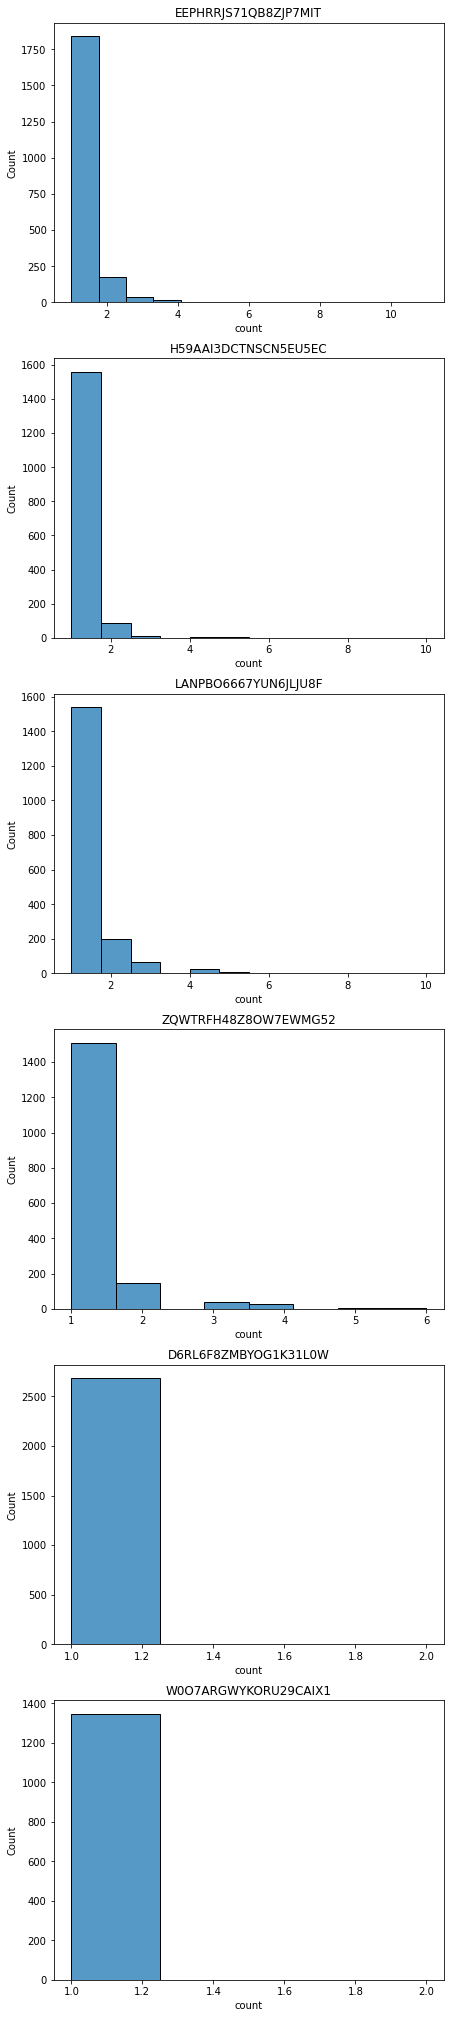

In [87]:
fig, ax = plt.subplots(len(c1_sub_array), 1, figsize=(7, len(c1_sub_array)*6))
for i in range(len(c1_sub_array)):
  sub = c1_count_sub[c1_count_sub['assoc_id'] == c1_sub_array[i]]
  bins = sub['count'].max() + 2
  sns.histplot(x=sub['count'], bins=bins, ax=ax[i])
  ax[i].set_title(c1_sub_array[i])

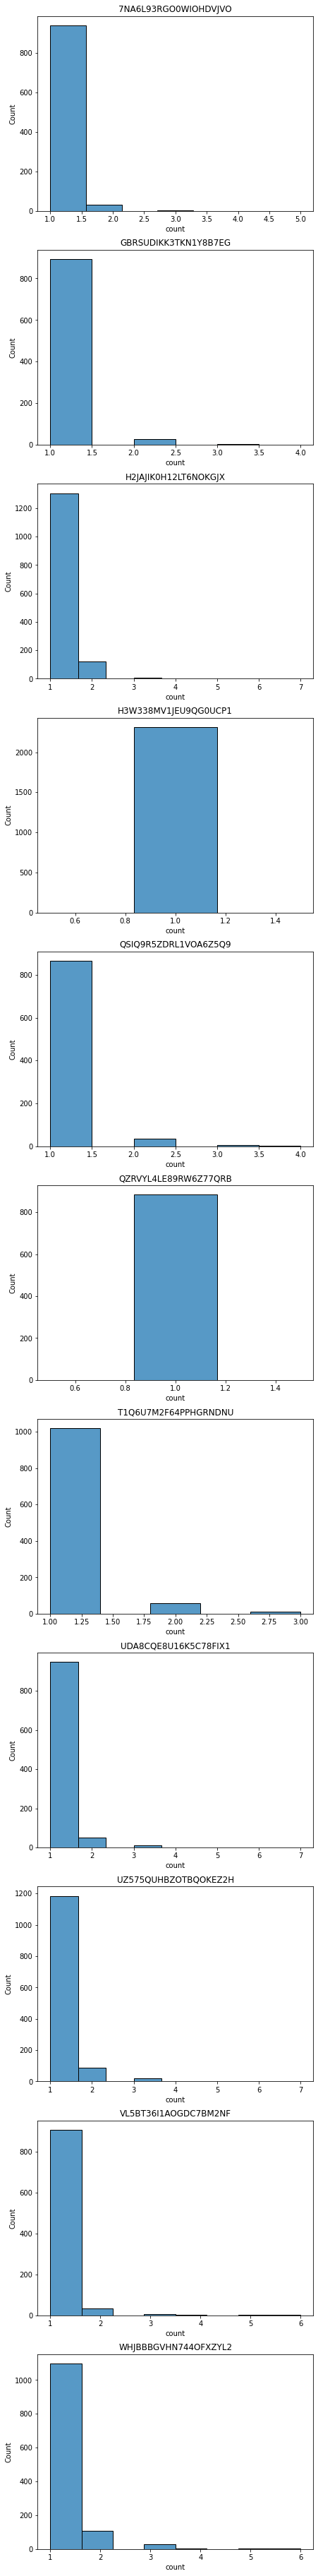

In [88]:
fig, ax = plt.subplots(len(c2_sub_array), 1, figsize=(7, len(c2_sub_array)*6))
for i in range(len(c2_sub_array)):
  sub = c2_count_sub[c2_count_sub['assoc_id'] == c2_sub_array[i]]
  bins = sub['count'].max() + 2
  sns.histplot(x=sub['count'], bins=bins, ax=ax[i])
  ax[i].set_title(c2_sub_array[i])